# Haar System

In [2]:
import numpy as np

def approximation(array):
    return array[:array.shape[0]//2]

def details(array):
    return array[array.shape[0]//2:]

def i_num(array):
    return int(np.ceil(np.log2(len(array))))

root2 = np.sqrt(2)
s = np.array([32, 32, 16, 8, 24, 16, 64, 32])

In [2]:
def direct_wavelet(array,output):
    N, N2, = array.shape[0], array.shape[0] // 2
    for i in range(0,N,2):
        output[int(i/2)] = (array[i] + array[i+1])/root2
        output[int(i/2 + N2)] = (array[i] - array[i+1])/root2
    return output

def inverse_wavelet(output,signal):
    N, N2,  = output.shape[0], output.shape[0] // 2
    for i in range(0,N,2):
        signal[i] = (output[int(i/2)] + output[int(i/2 + N2)])/root2
        signal[i+1] = (output[int(i/2)] - output[int(i/2 + N2)])/root2
    return signal


In [3]:
# DIRECT WAVELET TRANSFORM --> dwt
dwt = np.empty(len(s))
dwt = direct_wavelet(s,dwt)
print("\nApproximation coefficients (A1):", approximation(dwt))
print("Detail coefficients (D1):", details(dwt))

dwt2 = np.empty(len(approximation(dwt)))
dwt2 = direct_wavelet(approximation(dwt),dwt2)
print("\nApproximation coefficients (A2):", approximation(dwt2))
print("Detail coefficients (D2):", details(dwt2))


dwt3 = np.empty(len(approximation(dwt2)))
dwt3 = direct_wavelet(approximation(dwt2),dwt3)
print("\nApproximation coefficients (A3):", approximation(dwt3))
print("Detail coefficients (D3):", details(dwt3))


Approximation coefficients (A1): [45.254834   16.97056275 28.28427125 67.88225099]
Detail coefficients (D1): [ 0.          5.65685425  5.65685425 22.627417  ]

Approximation coefficients (A2): [44. 68.]
Detail coefficients (D2): [ 20. -28.]

Approximation coefficients (A3): [79.19595949]
Detail coefficients (D3): [-16.97056275]


In [4]:
# INVERSE WAVELET TRANSFORM
print("\nApproximation coefficients (A3):", approximation(dwt3))

rest_s2 = np.empty(2*len(approximation(dwt3)))
rest_s2 = inverse_wavelet(dwt3,rest_s2)
print("\nReconstructed Signal A2:", rest_s2)

rest_s1 = np.empty(2*len(approximation(dwt2)))
rest_s1 = inverse_wavelet(dwt2,rest_s1)
print("\nReconstructed Signal A1:", rest_s1)

rest_s = np.empty(2*len(approximation(dwt)))
rest_s = inverse_wavelet(dwt,rest_s)
print("\nReconstructed Signal:", rest_s)
print("Original Signal:", s)


Approximation coefficients (A3): [79.19595949]

Reconstructed Signal A2: [44. 68.]

Reconstructed Signal A1: [45.254834   16.97056275 28.28427125 67.88225099]

Reconstructed Signal: [32. 32. 16.  8. 24. 16. 64. 32.]
Original Signal: [32 32 16  8 24 16 64 32]


### EXAMPLE WITH MATRIX

In [4]:
def dividir_matriz(matriz):
    filas, columnas = matriz.shape
    mitad_filas = filas // 2
    mitad_columnas = columnas // 2
    submatrices = [matriz[i:i+mitad_filas, j:j+mitad_columnas] for i in range(0, filas, mitad_filas) 
                   for j in range(0, columnas, mitad_columnas)]
    return submatrices

def direct_wavelet2D_H(matrix):
    Nf,output = matrix.shape[0], np.zeros_like(matrix,dtype=float)
    for c in range(0, Nf, 2):
        output[:, c//2] = (matrix[:, c] + matrix[:, c+1]) / root2 
        output[:, 2 if c == 0 else 3 if c == 2 else c] = (matrix[:, c] - matrix[:, c+1]) / root2
    return output

def direct_wavelet2D_V(matrix):
    Nf,output = matrix.shape[0], np.zeros_like(matrix,dtype=float)
    for f in range(0, Nf, 2):
        output[f//2, :] = (matrix[f, :] + matrix[f+1, :]) / root2
        output[2 if f == 0 else 3 if f == 2 else f, :] = (matrix[f, :] - matrix[f+1, :]) / root2
    return output

def inverse_wavelet2D_V(output):
    N, N2, signal = output.shape[0], output.shape[0] // 2,np.zeros_like(output,dtype=float)
    for i in range(0, N-1, 2):
        signal[i, :] = (output[i//2, :] + output[i//2 + N2, :]) / root2
        signal[i+1, :] = (output[i//2, :] - output[i//2 + N2, :]) / root2
    return signal

def inverse_wavelet2D_H(output):
    N, N2, signal = output.shape[1], output.shape[1] // 2,np.zeros_like(output,dtype=float)
    for i in range(0, N-1, 2):
        signal[ :,i] = (output[ :,i//2] + output[ :,i//2 + N2]) / root2
        signal[ :,i+1] = (output[ :,i//2] - output[ :,i//2 + N2]) / root2
    # return signal
    return np.round(signal, decimals=2)

In [18]:
matriz = np.array([[32, 8, 4, 2],
                   [16, 0, 2, 4],
                   [8, 4, 8, 0],
                   [64, 2, 8, 16]])

# DIRECT WAVELET TRANSFORM
result = direct_wavelet2D_H(direct_wavelet2D_V(matriz))
print("\nOriginal Signal:\n", matriz)
print("\nDirect wevelet Matrix\n",result)

cA, cV, cH, cD = dividir_matriz(result)

# print("\nApproximation coefficients (A1):\n", cA)
# print("\nDetail coefficients (D1)")
# print(f"Horizontal Details (cH):\n{cH}\n")
# print(f"Vertical Details (cV):\n{cV}\n")
# print(f"Diagonal Details (cD):\n{cD}\n")

# INVERSE WAVELET TRANSFORM
reconstructed_matriz = np.zeros_like(result, dtype=float)
reconstructed_matriz = inverse_wavelet2D_H(inverse_wavelet2D_V(result))
print("\nReconstructed Signal:\n", reconstructed_matriz)


Original Signal:
 [[32  8  4  2]
 [16  0  2  4]
 [ 8  4  8  0]
 [64  2  8 16]]

Direct wevelet Matrix
 [[ 28.   6.  20.   0.]
 [ 39.  16.  33.   0.]
 [ 12.   0.   4.   2.]
 [-27.  -8. -29.   8.]]

Reconstructed Signal:
 [[32.  8.  4.  2.]
 [16. -0.  2.  4.]
 [ 8.  4.  8.  0.]
 [64.  2.  8. 16.]]


In [13]:
matriz = np.random.randint(low=1, high=101, size=(6, 6)) * 2

# print(matriz)


print("Imagen original:\n", matriz)
# print("\nDir Wavelet:\n", direct_wavelet2D_H(matriz))
print("\nInv Wavelet:\n", inverse_wavelet2D_H(direct_wavelet2D_H(matriz)))

Imagen original:
 [[ 24  96   6 180  80 190]
 [ 48 116 168 194 104 136]
 [108  52  20 130 166  96]
 [148  94 200  10 150   2]
 [128   2  84  26 112 162]
 [ 44  78 148  34 158  12]]

Inv Wavelet:
 [[-27. 147.  38. 148. 135. 135.]
 [ 69.  95. 165. 197. 120. 120.]
 [ 25. 135. 110.  40. 131. 131.]
 [216.  26. 179.  31.  76.  76.]
 [ 94.  36.  30.  80. 137. 137.]
 [118.   4. 164.  18.  85.  85.]]


## IMAGE DWT

In [8]:
import cv2
import IPython
import matplotlib.pyplot as plt


def imshow(img):
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

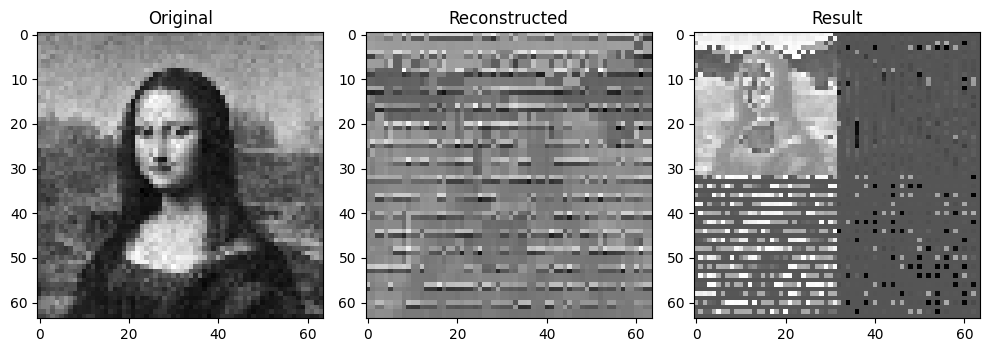

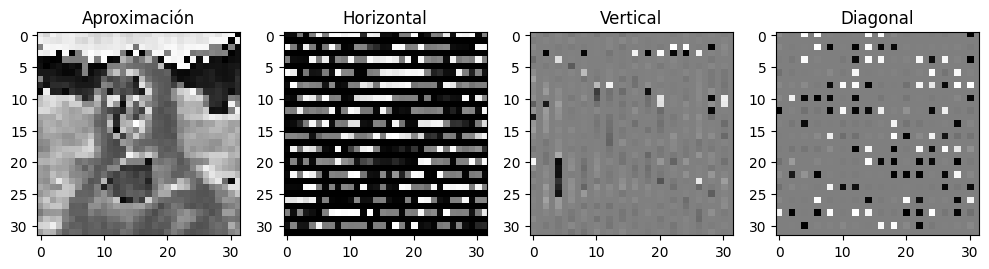

In [9]:
imgOr = cv2.imread(('image_color.jpg'), cv2.IMREAD_GRAYSCALE)
imgOr = cv2.resize(imgOr,(64,64))
imgOr = np.array(imgOr)

# DIRECT WAVELET TRANSFORM 
result = direct_wavelet2D_H(direct_wavelet2D_V(imgOr))

cA, cV, cH, cD = dividir_matriz(result)

reconstructed = np.zeros_like(imgOr, dtype=float)
reconstructed = inverse_wavelet2D_H(inverse_wavelet2D_V(result))

fig, axes = plt.subplots(1, 3, figsize=(10, 10))
axes[0].imshow(imgOr, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(reconstructed, cmap='gray')
axes[1].set_title('Reconstructed')
axes[2].imshow(result, cmap='gray')
axes[2].set_title('Result')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 4, figsize=(10, 10))
axes[0].imshow(cA, cmap='gray')
axes[0].set_title('Aproximación')
axes[1].imshow(cH, cmap='gray')
axes[1].set_title('Horizontal')
axes[2].imshow(cV, cmap='gray')
axes[2].set_title('Vertical')
axes[3].imshow(cD, cmap='gray')
axes[3].set_title('Diagonal')

plt.tight_layout()
plt.show()

In [10]:
print("Imagen original:\n", imgOr)
print("\nDir Wavelet:\n", direct_wavelet2D_H(imgOr))
print("\nInv Wavelet:\n", inverse_wavelet2D_H(direct_wavelet2D_H(imgOr)))

Imagen original:
 [[107 111 110 ... 109 117 120]
 [121 121 101 ... 135 139 141]
 [116 115 117 ... 122 120 115]
 ...
 [102 109 110 ...  94  89  70]
 [ 87  87 104 ...  82  98  91]
 [ 71  69  81 ...  45  47  58]]

Dir Wavelet:
 [[154.1492783  148.49242405 169.70562748 ...   0.         178.89801564
    0.        ]
 [171.11984105 153.44217152 173.94826817 ...   0.         179.60512242
    0.        ]
 [163.34166645 158.39191899 164.75588002 ...   0.           3.53553391
    0.        ]
 ...
 [149.19953083 142.12846302 164.75588002 ...   0.          13.43502884
    0.        ]
 [123.03657993 132.93607486 141.42135624 ...   0.           4.94974747
    0.        ]
 [ 98.99494937 125.15790027 111.01576465 ...   0.         173.24116139
    0.        ]]

Inv Wavelet:
 [[ 235.5  -17.5  105.  ...  -14.   118.5  118.5]
 [ 129.   113.   108.5 ... -119.5   12.    12. ]
 [ 239.5   -8.5  112.  ...  123.5  117.5  117.5]
 ...
 [ 111.5   99.5  100.5 ...   79.5   79.5   79.5]
 [  89.    85.    94.  ...   83